In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting

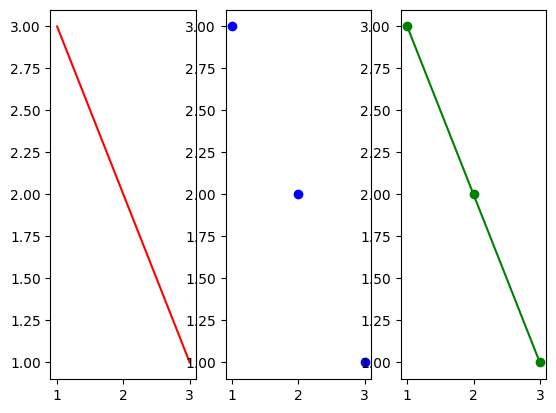

In [2]:
x = [1, 2, 3]
y = [3, 2, 1]

figure, axis = plt.subplots(1, 3)

axis[0].plot(x, y, color='r')
axis[1].scatter(x, y, color='b')
axis[2].plot(x, y, color='g')
axis[2].scatter(x, y, color='g')

plt.show()

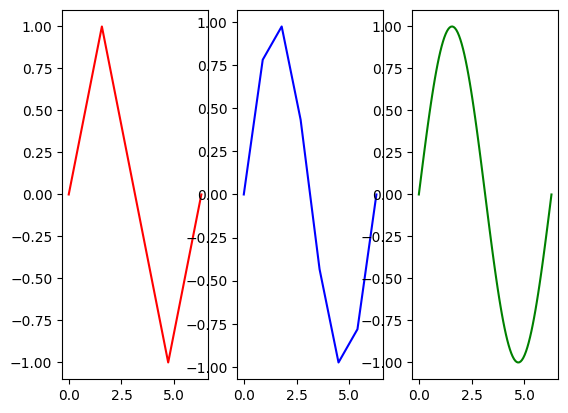

In [3]:
x1 = np.linspace(0, 2*np.pi, 5)
x2 = np.linspace(0, 2*np.pi, 8)
x3 = np.linspace(0, 2*np.pi, 100)
y1 = [np.sin(i) for i in x1]
y2 = [np.sin(i) for i in x2]
y3 = [np.sin(i) for i in x3]

figure, axis = plt.subplots(1, 3)

axis[0].plot(x1, y1, color='r')
axis[1].plot(x2, y2, color='b')
axis[2].plot(x3, y3, color='g')

plt.show()

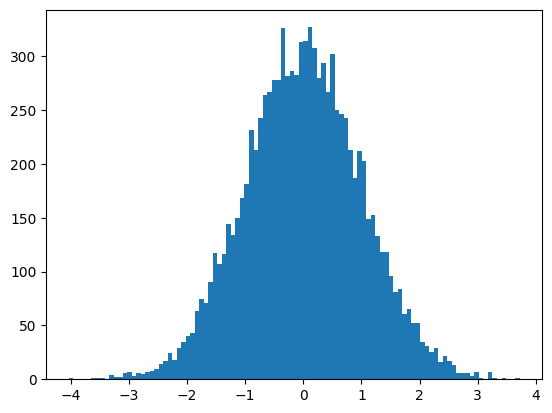

In [4]:
x = np.random.randn(10000)

plt.hist(x, bins=100)
plt.show()

In [5]:
print(x[x < -3], '\n')
print(x[x < -3].size)

[-4.03362181 -3.05715266 -3.54508461 -3.1858565  -3.11463975 -3.27223429
 -3.61016628 -3.01478937 -3.25892965 -3.00790508 -3.09188699 -3.24236693
 -3.03521959 -3.08596652 -3.29158763 -3.44766172 -3.00934818 -3.09756716
 -3.09121549 -3.30442926 -3.16893797] 

21


# Pandas
## Dataframes

In [6]:
df = pd.DataFrame({'name': ['Ali', 'Mina'], 'age': [25, 22]})
df

,name,age
0,Ali,25
1,Mina,22


### read dataframes from the given path
```
path = ''
df = pd.read_csv(path)
```

### column names
```
df.columns
```

In [7]:
df.columns

Index(['name', 'age'], dtype='object')

### getting informations of a dataframe
```
df.info()
```

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2 non-null      object
 1   age     2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 164.0+ bytes


### statistics analysis of a dataframe
```
df.describe()               # only includes numeric columns
df.describe(include='all')  # includes all columns, including strings
```

In [9]:
df.describe()

,age
count,2.00000
mean,23.50000
std,2.12132
min,22.00000
25%,22.75000
50%,23.50000
75%,24.25000
max,25.00000


In [10]:
df.describe(include='all')

,name,age
count,2,2.00000
unique,2,NaN
top,Ali,NaN
freq,1,NaN
mean,NaN,23.50000
std,NaN,2.12132
min,NaN,22.00000
25%,NaN,22.75000
50%,NaN,23.50000
75%,NaN,24.25000


### slicing dataframes
```
df[df.column_name > value]
```

In [11]:
df[df.age > 22]

,name,age
0,Ali,25


### datafram head & tail
```
df.head(5)
df.tail(5)
```

# clustering
## k-means

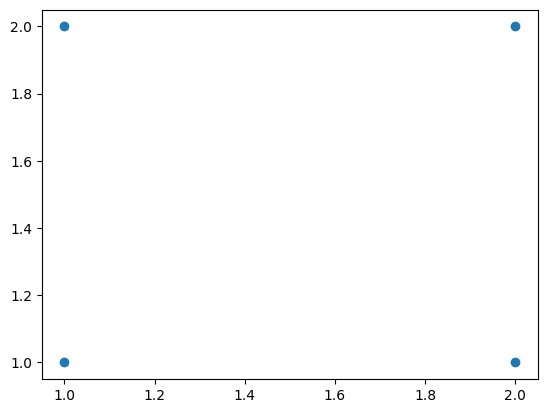

In [12]:
df = pd.DataFrame({'x':[1, 2, 1, 2], 'y':[1, 1, 2, 2]})

plt.scatter(df.x, df.y)
plt.show()

In [13]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [14]:
k_means = KMeans(n_clusters=2)
k_means.fit(df)

KMeans(n_clusters=2)

In [15]:
print('labels:', k_means.labels_)
print('inertia:', k_means.inertia_)

labels: [0 0 1 1]
inertia: 1.0


### K-means limitations
* Setting a value for k
* Numeric variables only
* Sensetive to initial conditions
* Data has no noises or outliers
* Data has symmertric distribution of variables
* Good in spherical-like shapes
* Variables in the same scale
* There is no collinearity

### Evaluation metrics & Elbow method
**Inertia**
$$ Inertia = \sum_{j=1}^k \sum_{i=1}^n ||x_i^{(j)} - c_j||^2 $$
$$ k = \text{number of clusters} $$
$$ n = \text{number of cases} $$
$$ c = \text{centroid for cluster j} $$
$$ x = \text{case i of cluster j} $$
$$ ||\text{formula}|| = distance function $$
<br>

<div style="text-align: center">
    <img src="https://media.licdn.com/dms/image/D4D12AQF-yYtbzPvNFg/article-cover_image-shrink_720_1280/0/1682277078758?e=1697673600&v=beta&t=-U7aWnM4lGUdjAQPhcNzlybSsKEF6H7f2-FymLPhER4">
</div>

k = 1
labels = [0 0 0 0]
inercia = 2.0
------------
k = 2
labels = [1 1 0 0]
inercia = 1.0
------------
k = 3
labels = [2 1 0 0]
inercia = 0.5
------------
k = 4
labels = [0 2 3 1]
inercia = 0.0
------------


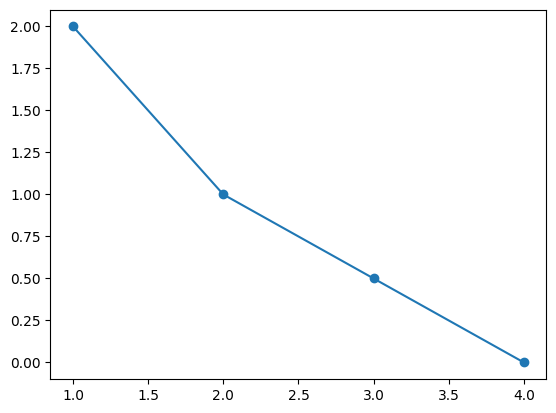

In [16]:
x = []
y = []
for k in range(1, 5):
    k_means = KMeans(n_clusters=k)
    k_means.fit(df)
    
    print('k =', k)
    print('labels =', k_means.labels_)
    print('inercia =', k_means.inertia_)
    print('------------')

    x.append(k)
    y.append(k_means.inertia_)

plt.scatter(x, y)
plt.plot(x, y)
plt.show()

## Outliers & Noise

**Outlier** <br>
A data point that deviates significantly from the majority of other data points in a dataset.

**noise** <br>
Refers to random or irrelevant variations present in data that can obscure meaningful patterns or relationships.
<br>

<div style="text-align: center">
    <img src="https://www.researchgate.net/profile/Shahla-Asadi/publication/339483610/figure/fig1/AS:862802700947464@1582719602359/Example-of-single-and-batch-outliers-in-sensory-data.png"/>
</div>

### Outlier Detection Methods
* IQR (Interquaritile Range)
* Z-score
* LOF (Local Outlier Factor)
* Isolation Forest
* DBSCAN
* etc.

### k-means example

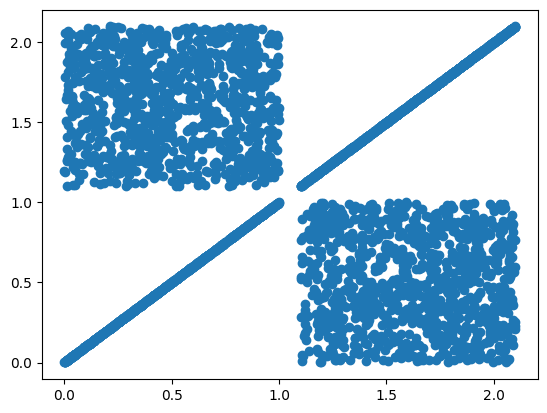

In [17]:
a = np.random.rand(1000)
b = np.random.rand(1000) + 1.1

x = np.concatenate((a, a, b, b))
y = np.concatenate((a, b, a, b))

plt.scatter(x, y)
plt.show()

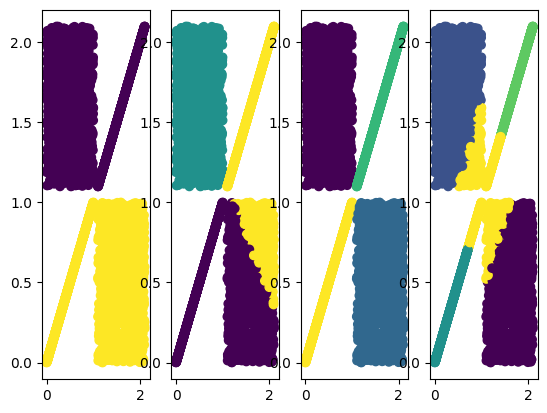

<Figure size 1000x500 with 0 Axes>

In [18]:
df = pd.DataFrame({'x': x, 'y': y})

k_means_2 = KMeans(n_clusters=2)
k_means_3 = KMeans(n_clusters=3)
k_means_4 = KMeans(n_clusters=4)
k_means_5 = KMeans(n_clusters=5)

k_means_2.fit(df)
k_means_3.fit(df)
k_means_4.fit(df)
k_means_5.fit(df)

figure, axis = plt.subplots(1, 4)


axis[0].scatter(df.x, df.y, c=k_means_2.labels_)
axis[1].scatter(df.x, df.y, c=k_means_3.labels_)
axis[2].scatter(df.x, df.y, c=k_means_4.labels_)
axis[3].scatter(df.x, df.y, c=k_means_5.labels_)

plt.figure(figsize=(10, 5), dpi=100)

plt.show()

#### Visualizing elbow method in this example

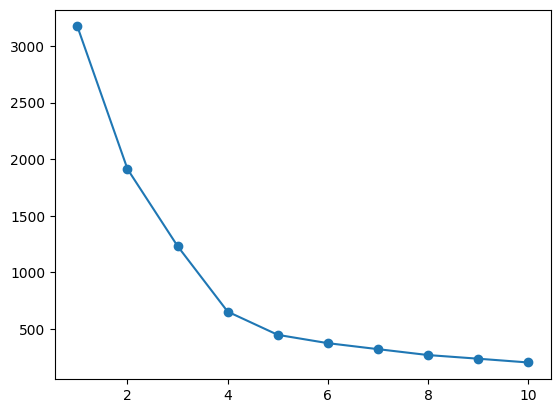

In [19]:
inertia = []
for k in range(1, 11):
    k_means = KMeans(n_clusters=k)
    k_means.fit(df)

    inertia.append(k_means.inertia_)

plt.scatter(range(1, 11), inertia)
plt.plot(range(1, 11), inertia)

plt.show()


let's add an outlier point

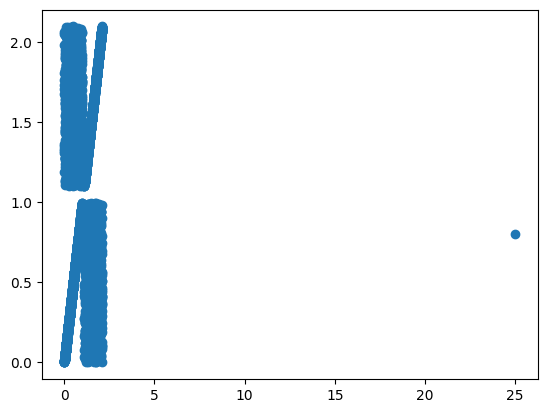

In [20]:
a = np.random.rand(1000)
b = np.random.rand(1000) + 1.1

x = np.concatenate((a, a, b, b, np.array([25])))
y = np.concatenate((a, b, a, b, np.array([0.8])))

plt.scatter(x, y)
plt.show()

not let's fit k-means on this dataset with k=4

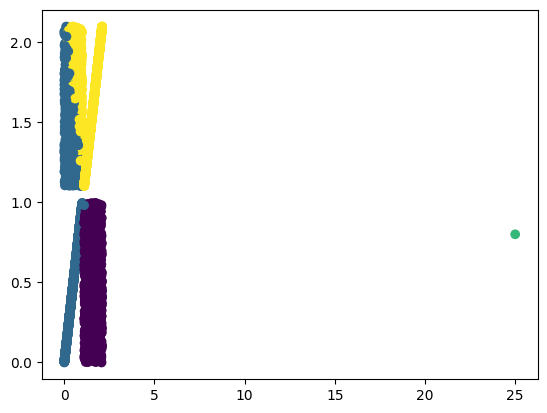

<Figure size 2500x500 with 0 Axes>

In [21]:
df = pd.DataFrame({'x': x, 'y': y})

k_means = KMeans(n_clusters=4)

k_means.fit(df)

plt.scatter(df.x, df.y, c=k_means.labels_)
plt.figure(figsize=(25, 5), dpi=100)

plt.show()

### Outlier Handling
* Reporting
* Removing
* Imputation
* Transision
* Capping & Flooring
* Data Segmentation

#### Feature Scaling

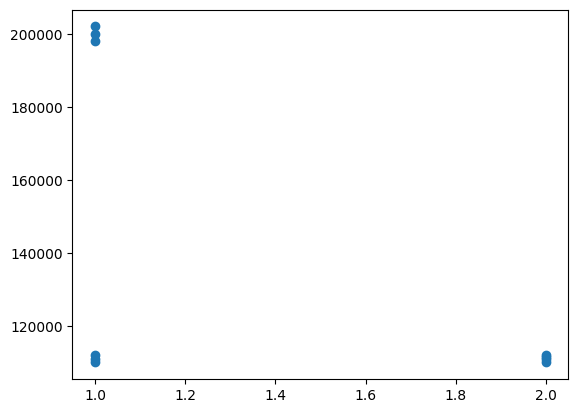

In [22]:
x = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
y = [110000, 111000, 112000, 200000, 202000, 198000, 110000, 111000, 112000, 111500]

df = pd.DataFrame({'x': x, 'y': y})

plt.scatter(df.x, df.y)
plt.show()

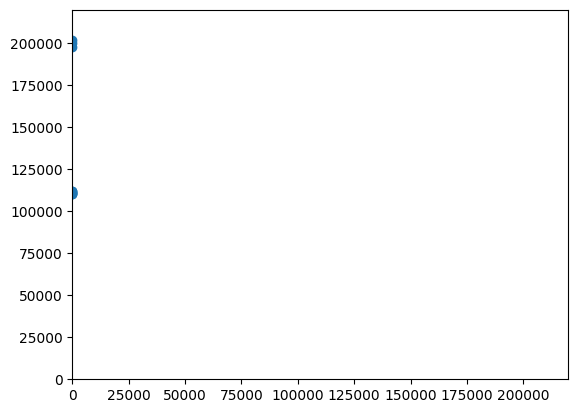

In [23]:
plt.xlim(0, 220000)
plt.ylim(0, 220000)

plt.scatter(df.x, df.y)
plt.show()

### Normalization

$$ X_{new} = {X - X_{min} \over X_{max} - X_{min}} $$

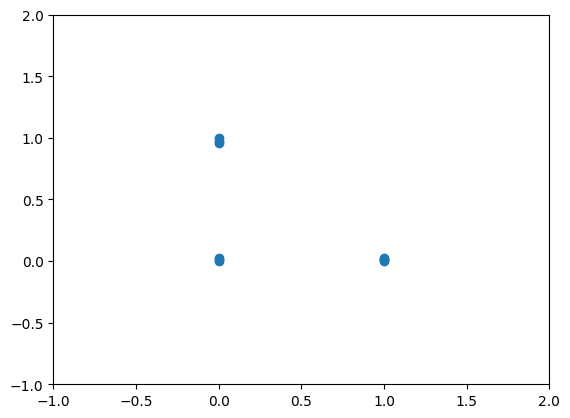

In [24]:
x = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
y = [110000, 111000, 112000, 200000, 202000, 198000, 110000, 111000, 112000, 111500]

df = pd.DataFrame({'x': x, 'y': y})

# Normalization
df.x = (df.x - df.x.min()) / (df.x.max() - df.x.min())
df.y = (df.y - df.y.min()) / (df.y.max() - df.y.min())

plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.scatter(df.x, df.y)
plt.show()

### Standardization

$$ X' = {X - \text{Mean} \over \text{Standard Deviation}} $$

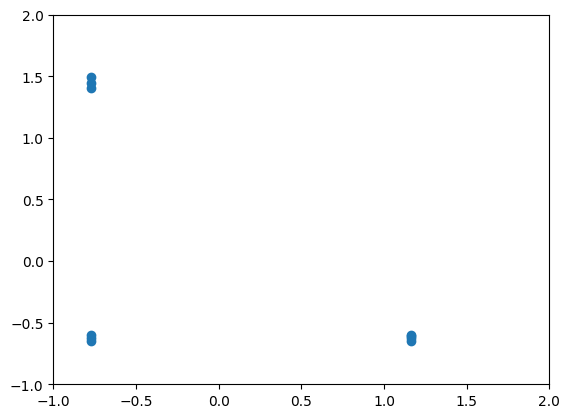

In [25]:
x = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
y = [110000, 111000, 112000, 200000, 202000, 198000, 110000, 111000, 112000, 111500]

df = pd.DataFrame({'x': x, 'y': y})

# Normalization
df.x = (df.x - df.x.mean()) / (df.x.std())
df.y = (df.y - df.y.mean()) / (df.y.std())

plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.scatter(df.x, df.y)
plt.show()

### Feature Scaling using sklearn - Normalization

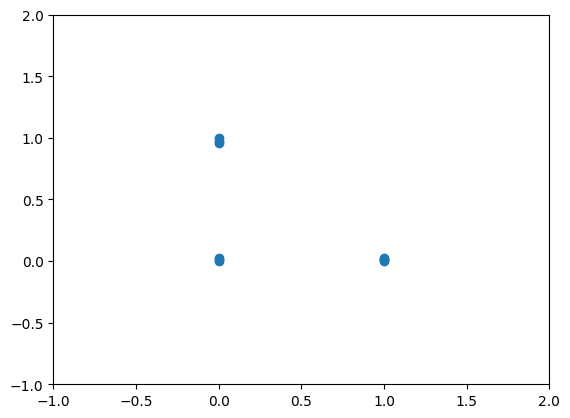

In [27]:
from sklearn.preprocessing import MinMaxScaler

x = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
y = [110000, 111000, 112000, 200000, 202000, 198000, 110000, 111000, 112000, 111500]

scaler = MinMaxScaler()

df = pd.DataFrame({'x': x, 'y': y})
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.scatter(df.x, df.y)
plt.show()


### Feature Scaling using sklearn - Standardization

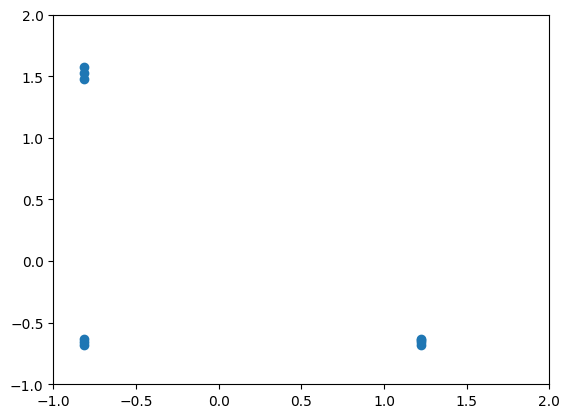

In [28]:
from sklearn.preprocessing import StandardScaler

x = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
y = [110000, 111000, 112000, 200000, 202000, 198000, 110000, 111000, 112000, 111500]

scaler = StandardScaler()

df = pd.DataFrame({'x': x, 'y': y})
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.scatter(df.x, df.y)
plt.show()


## Other k-Clustering Algorithms
* **KMeans++** <br>
A method for initializing clustel centroids in K-means clustering that selects centroids with a higher probability of being distant from each other.

* **KMedoids** <br>
A clustering algorithm that uses actual data points as cluster representatives (medoids) instead of centroids, making it more robust to outliers.

* **KModes** <br>
A clustering algorithm designed for categorical data that identifies clusters based on the most frequent categorical values.

* **KPrototype** <br>
A hybrid clustering algorithm that combines K-means for numerical data and K modes for categorical data to handle mixed data types within a dataset.

## Covariance & Correlation

Covariance is used to understand the relationship between two variables and how they might move in relation to each other. <br>

$$ Cov(x, y) = {\sum(x_i - \={x}) * (y_i - \={y}) \over N}  $$

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables. It not only shows the kind of relation (in terms of direction), but also how strong the relationship is.

$$ Correlation = {Cov(x, y) \over \sigma{x} * \sigma{y}}$$

### Missing Values Handling
* Row Deletion
* Column Deletion
* Mean/Median/Mode Imputation
* Regression
* KNN
* Interpolation
* Predictive Models
* Grouping Techniques